# 09-3 LSTM과 GRU 셀
순환 신경망에서 빼놓을 수 없는 핵심 기술인 LSTM과 GRU 셀을 사용한 모델을 만든다.

## LSTM 구조

LSTM에는 입력과 가중치를 곱하고 절편을 더해 활성화 함수를 통과시키는 구조를 여러 개 가지고 있다. 이런 계산 결과는 다음 타임스텝에 재사용된다.

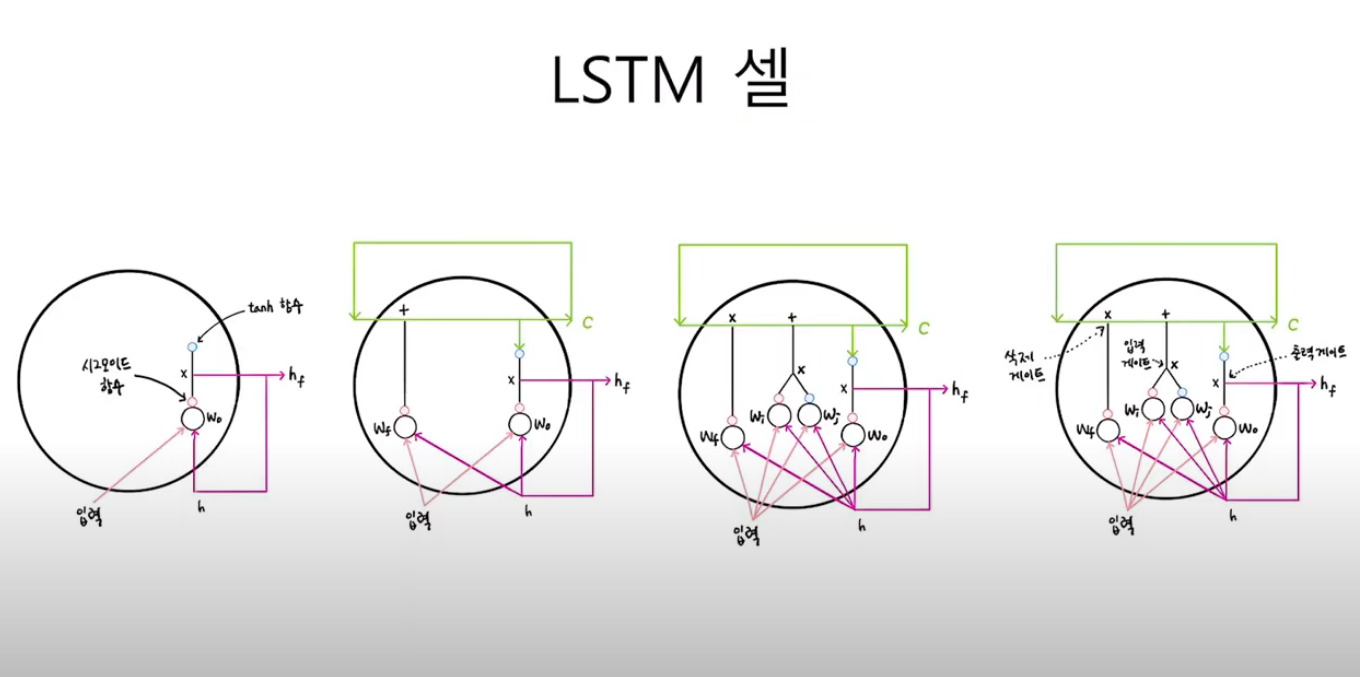

## LSTM 신경망 훈련하기

In [1]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17464789/17464789 [==============================] - 2s 0us/step


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [3]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 11s 10ms/step - loss: 0.6923 - accuracy: 0.5416 - val_loss: 0.6912 - val_accuracy: 0.5742
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6892 - accuracy: 0.6046 - val_loss: 0.6868 - val_accuracy: 0.6224
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6804 - accuracy: 0.6362 - val_loss: 0.6712 - val_accuracy: 0.6422
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6351 - accuracy: 0.6740 - val_loss: 0.6061 - val_accuracy: 0.7274
Epoch 5/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5862 - accuracy: 0.7431 - val_loss: 0.5807 - val_accuracy: 0.7494
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5641 - accuracy: 0.7609 - val_loss: 0.5632 - val_accuracy: 0.7494
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5449 - accuracy: 0.7672 - val_loss: 0.5454 - val_accuracy: 0.76

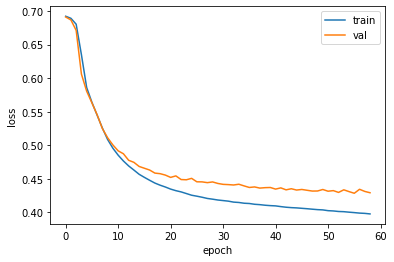

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## 순환층에 드롭아웃 적용하기

드롭아웃은 은닉층에 있는 뉴런의 출력을 랜덤하게 꺼서 과대적합을 막는 기법이다.

In [10]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))
# 전체적인 모델 구조는 이전과 동일
# LSTM 클래스에 dropout 매개변수를 0.3으로 지정하여 30%의 입력을 드롭아웃한다.

In [11]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 12ms/step - loss: 0.6928 - accuracy: 0.5214 - val_loss: 0.6925 - val_accuracy: 0.5204
Epoch 2/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6915 - accuracy: 0.5796 - val_loss: 0.6909 - val_accuracy: 0.5824
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6887 - accuracy: 0.6169 - val_loss: 0.6868 - val_accuracy: 0.6298
Epoch 4/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6799 - accuracy: 0.6575 - val_loss: 0.6698 - val_accuracy: 0.6488
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6286 - accuracy: 0.6858 - val_loss: 0.6058 - val_accuracy: 0.7280
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5907 - accuracy: 0.7372 - val_loss: 0.5835 - val_accuracy: 0.7382
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 0.5721 - accuracy: 0.7442 - val_loss: 0.5641 - val_accuracy: 0

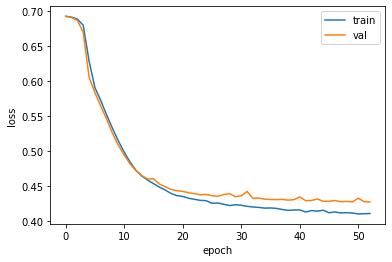

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## 2개의 층을 연결하기

밀집층이나 합성곱 층처럼 순환층도 여러 개를 쌓을 수 있다. 순환층을 연결할 때는 한 가지 주의사항이 있다.

앞쪽의 순환층이 모든 타임스텝에 대한 은닉 상태를 출력해야 하고, 오직 마지막 순환층만 마지막 타임스텝의 은닉 상태를 출력해야 한다.

In [13]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500,16,input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [14]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_4 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_5 (LSTM)               (None, 8)                 544       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [15]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 8s 16ms/step - loss: 0.6925 - accuracy: 0.5306 - val_loss: 0.6916 - val_accuracy: 0.6006
Epoch 2/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6885 - accuracy: 0.6093 - val_loss: 0.6835 - val_accuracy: 0.6758
Epoch 3/100
313/313 [==============================] - 5s 17ms/step - loss: 0.6652 - accuracy: 0.6854 - val_loss: 0.6352 - val_accuracy: 0.7172
Epoch 4/100
313/313 [==============================] - 5s 16ms/step - loss: 0.6003 - accuracy: 0.7271 - val_loss: 0.5754 - val_accuracy: 0.7304
Epoch 5/100
313/313 [==============================] - 5s 16ms/step - loss: 0.5594 - accuracy: 0.7376 - val_loss: 0.5475 - val_accuracy: 0.7392
Epoch 6/100
313/313 [==============================] - 4s 14ms/step - loss: 0.5366 - accuracy: 0.7481 - val_loss: 0.5276 - val_accuracy: 0.7486
Epoch 7/100
313/313 [==============================] - 4s 13ms/step - loss: 0.5174 - accuracy: 0.7574 - val_loss: 0.5114 - val_accuracy:

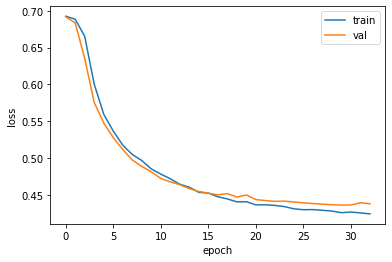

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## GRU 구조
Gated Recurrent Unit의 약자로, 이 셀은 LSTM을 간소화한 버전으로 생각할 수 있다.

GRU 셀은 LSTM보다 가중치가 적기 때문에 계산량이 적지만 LSTM 못지않은 좋은 성능을 내는 것으로 알려져 있다.

In [17]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500,16,input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [18]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [19]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 5s 10ms/step - loss: 0.6927 - accuracy: 0.5164 - val_loss: 0.6919 - val_accuracy: 0.5324
Epoch 2/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6900 - accuracy: 0.5813 - val_loss: 0.6886 - val_accuracy: 0.5872
Epoch 3/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6853 - accuracy: 0.6171 - val_loss: 0.6827 - val_accuracy: 0.6174
Epoch 4/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6769 - accuracy: 0.6400 - val_loss: 0.6722 - val_accuracy: 0.6346
Epoch 5/100
313/313 [==============================] - 3s 9ms/step - loss: 0.6618 - accuracy: 0.6544 - val_loss: 0.6529 - val_accuracy: 0.6530
Epoch 6/100
313/313 [==============================] - 3s 8ms/step - loss: 0.6339 - accuracy: 0.6738 - val_loss: 0.6142 - val_accuracy: 0.6836
Epoch 7/100
313/313 [==============================] - 3s 8ms/step - loss: 0.5725 - accuracy: 0.7141 - val_loss: 0.5457 - val_accuracy: 0.740

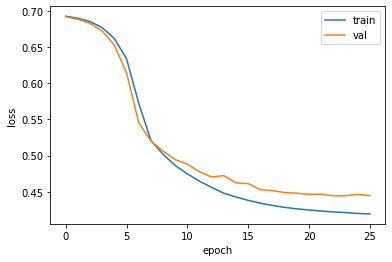

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

## LSTM과 GRU 셀로 훈련
이제 2개의 순환층을 쌓은 모델을 다시 로드하여 테스트 세트에 대한 성능을 확인해보자. 먼저 테스트 세트를 훈련 세트와 동일한 방식으로 변환한다. 그다음 load_model() 함수를 사용해 best-2rnn-modle.h5 파일을 읽고 evaluate()메서드로 테스트 세트에서 성능을 계산한다.

In [21]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 5s 6ms/step - loss: 0.4325 - accuracy: 0.7973


[0.4325334429740906, 0.7972800135612488]

이 모델은 드롭아웃을 적용하여 과대적합을 잘 억제했기 때문에 테스트 세트의 성능이 검증 세트와 크게 차이 나지 않는 것으로 판단됨.